In [69]:
import scipy.stats
import random
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

1). Z critical value for the left-tailed test.  
2). Z critical value for the right-tailed test.  
3) Z critical value for the two tailed test.  
Assuming significance level is 0.05. 


In [3]:
#define confidence level, which is 1 - significance level
#define significance level
alpha = 0.05
#define confidence level, which is 1 - significance level
confidence_level = 1 - alpha
#left tailed test
z_critical_left = scipy.stats.norm.ppf(alpha)
#right tailed test
z_critical_right = scipy.stats.norm.ppf(1-alpha)
#two tailed test
z_critical_two = scipy.stats.norm.ppf(alpha/2)
print([z_critical_left,z_critical_right, z_critical_two])

[-1.6448536269514729, 1.6448536269514722, -1.9599639845400545]


In [4]:
scipy.stats.norm.ppf(0.01)

-2.3263478740408408

In [56]:
scipy.stats.norm.ppf(0.05)

-1.6448536269514729

In [13]:
scipy.stats.norm.cdf(-1.06)

0.1445722996639096

In [55]:
scipy.stats.norm.cdf(2.58) - scipy.stats.norm.cdf(-2.58)

0.9901199684844586

In [15]:
scipy.stats.norm.ppf(0.005)

-2.575829303548901

In [17]:
scipy.stats.norm.ppf(0.05)

-1.6448536269514729

Simulation  
Suppose we know the proportion of American adults who support the expansion of solar energy is \p = 0.88, which is our parameter of interest in our population. if we were to take a poll of 1,000 American adults on this topic, the estimate would not be perfect, but how close might we expect the sample proportion in the poll would be to 88%? We want to understand, how does the sample proportion \p_hat behave when the true population proportion is 0.88. We can simulate responses we would get from a simple random sample of 1,000 American adults, which is only possible because we know the actual support for expanding solar energy is 0.88. Here is how we might go about constructing such a simulation:  
1. There are about 250 million American adults in 2018. On 250 million pieces of paper, write 1 on 88% of them and 0 on the other 12%.  
2. Mix up the pieces of paper and pull out 1,000 pieces to represent our sample of 1,000 American adults.  
3. Compute the fraction of the sample that say "support".  

In [9]:
#create a set pf 250 million entries, where 88% of them are "support" (1), and 12% are not (0)
pop_size = 250000000
p = 0.88
possible_entries = [1] * int((pop_size * p)) + [0] * int((pop_size - pop_size * p))

In [11]:
#sample 1,000 entries without replacement from the population of interests
sample_entries = random.sample(possible_entries, 1000)

In [13]:
#compute p-hat
p_hat = np.average(sample_entries)
p_hat

0.904

In [16]:
#define number of simulation
number_of_samples = 10000
#Reperat the sampling size 1,000 for a 10,000 times, and calculate every p-hat from the samples and store them in a list
sample_mean1000 = [np.average(random.sample(possible_entries, 1000)) for i in range(0, number_of_samples)]

Text(0.5, 1.0, 'sample size of 1,000')

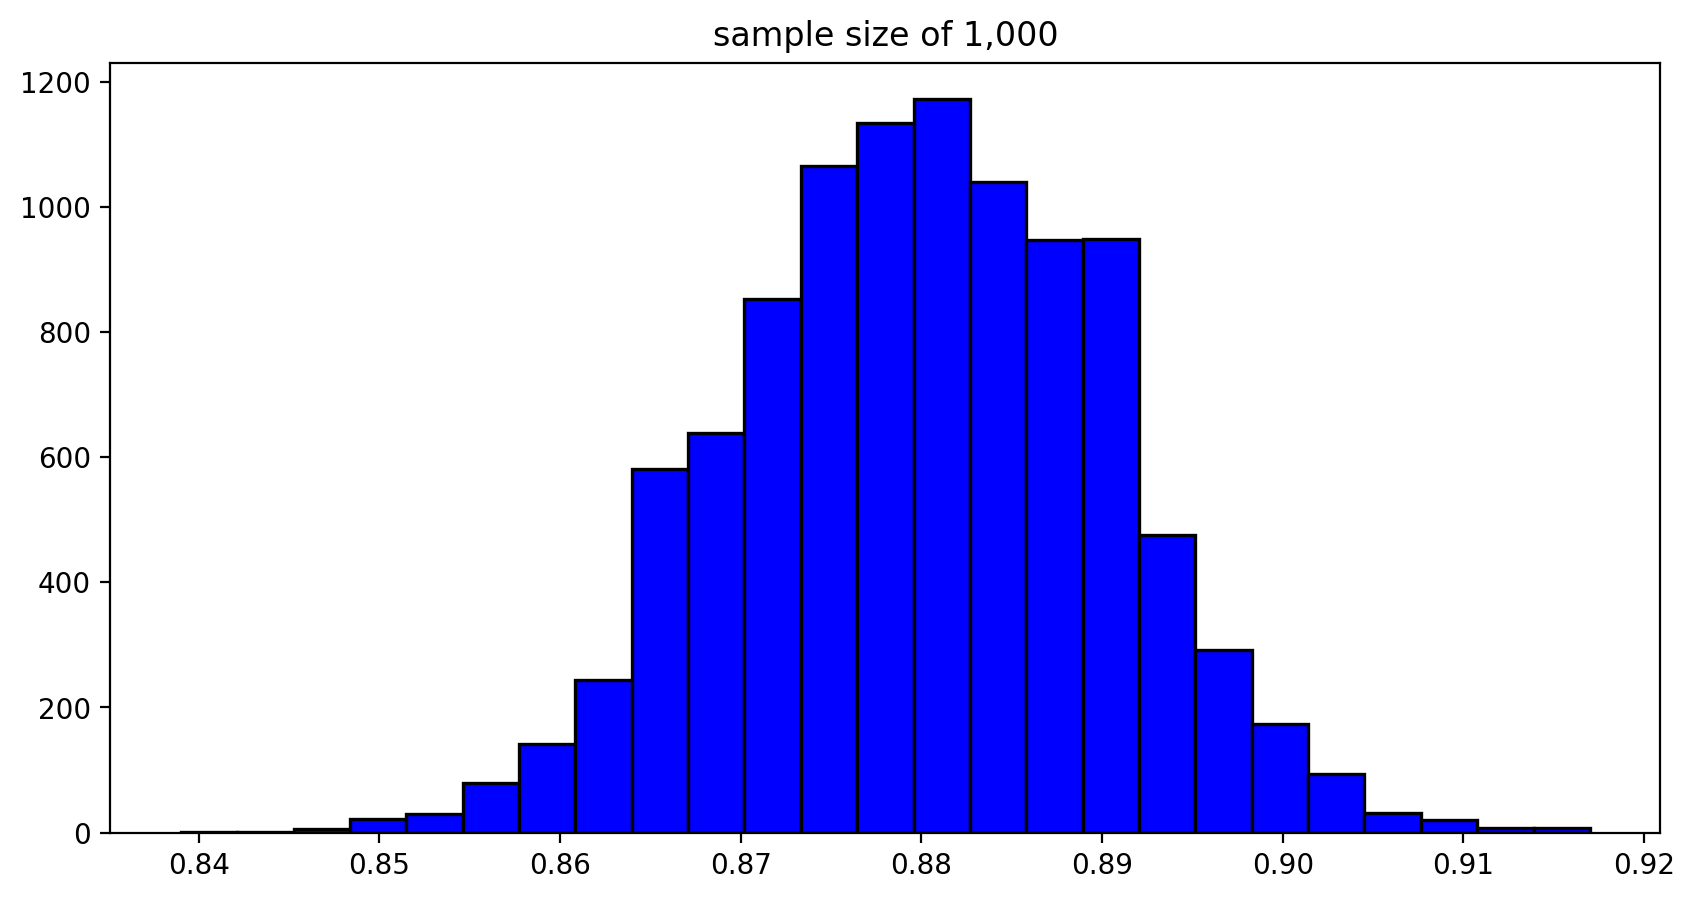

In [18]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sample_mean1000, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("sample size of 1,000")

In [46]:
#construct samples of size 10 and draw 10,000 of those samples from the population
sample_mean10 = [np.average(random.sample(possible_entries,10)) for i in range(0, number_of_samples)]
#construct samples of size 100 and draw 10,000 of those samples from the population
sample_mean100 = [np.average(random.sample(possible_entries, 100))for i in range(0, number_of_samples)]
#construct samples of size 1,000 and draw 10,000 of those samples from the population
sample_mean1000 = [np.average(random.sample(possible_entries, 1000)) for i in range(0,number_of_samples)]
#construct samples of size 10,000 and draw 10,000 of those samples from the population
sample_mean10000 = [np.average(random.sample(possible_entries, 10000)) for i in range(0,number_of_samples)]

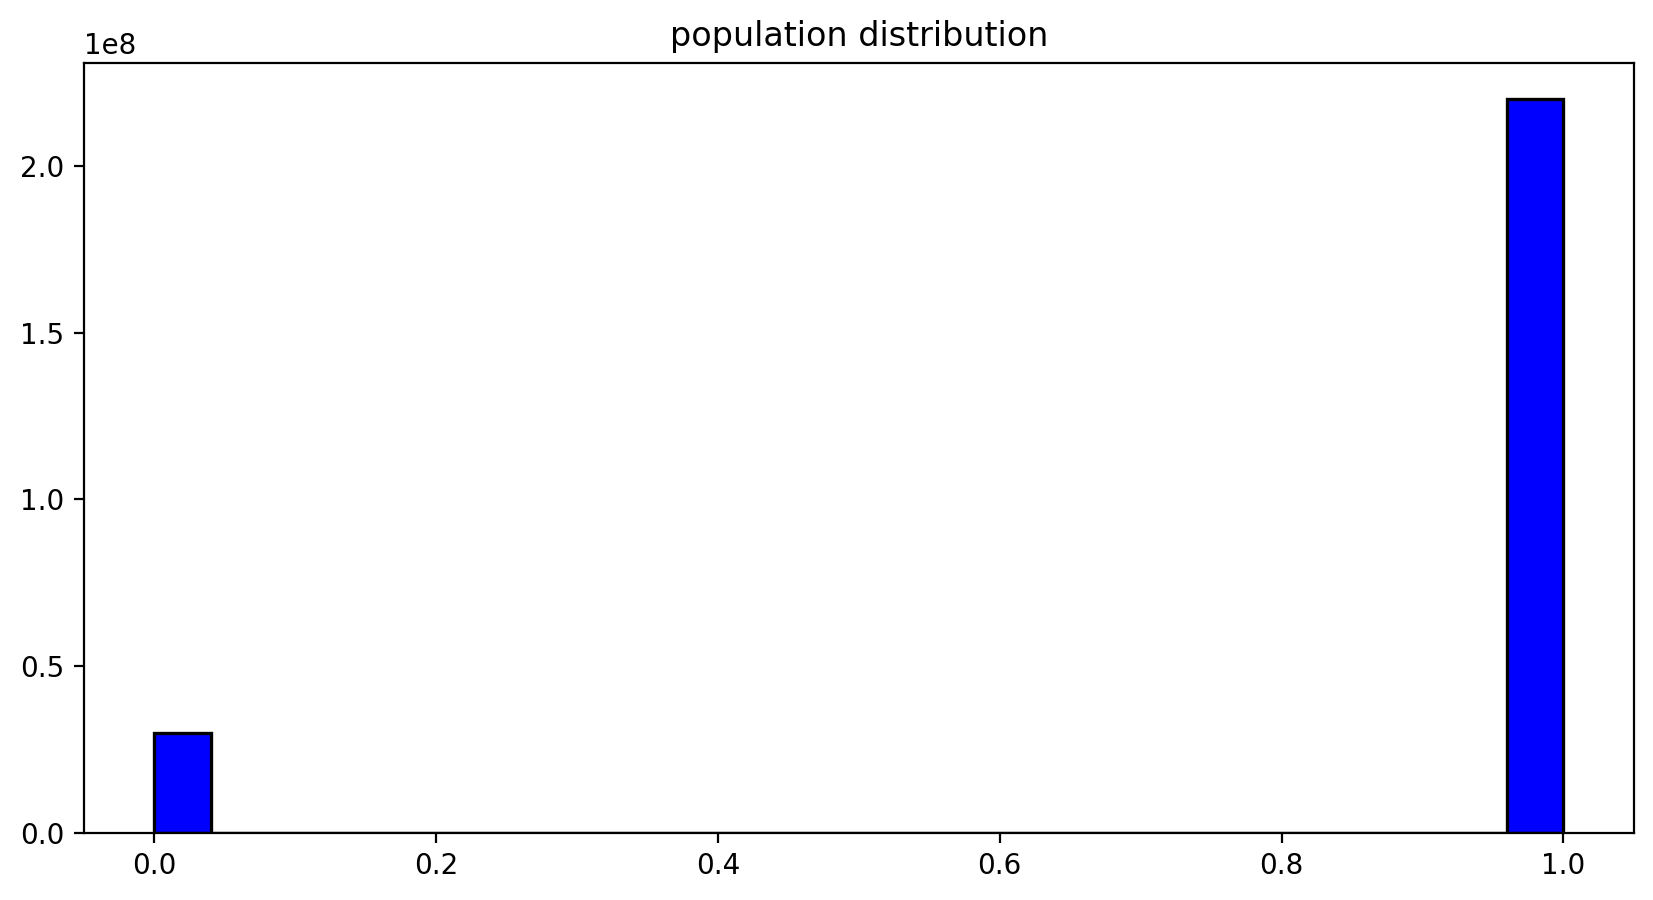

In [25]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(possible_entries, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("population distribution")
plt.show()


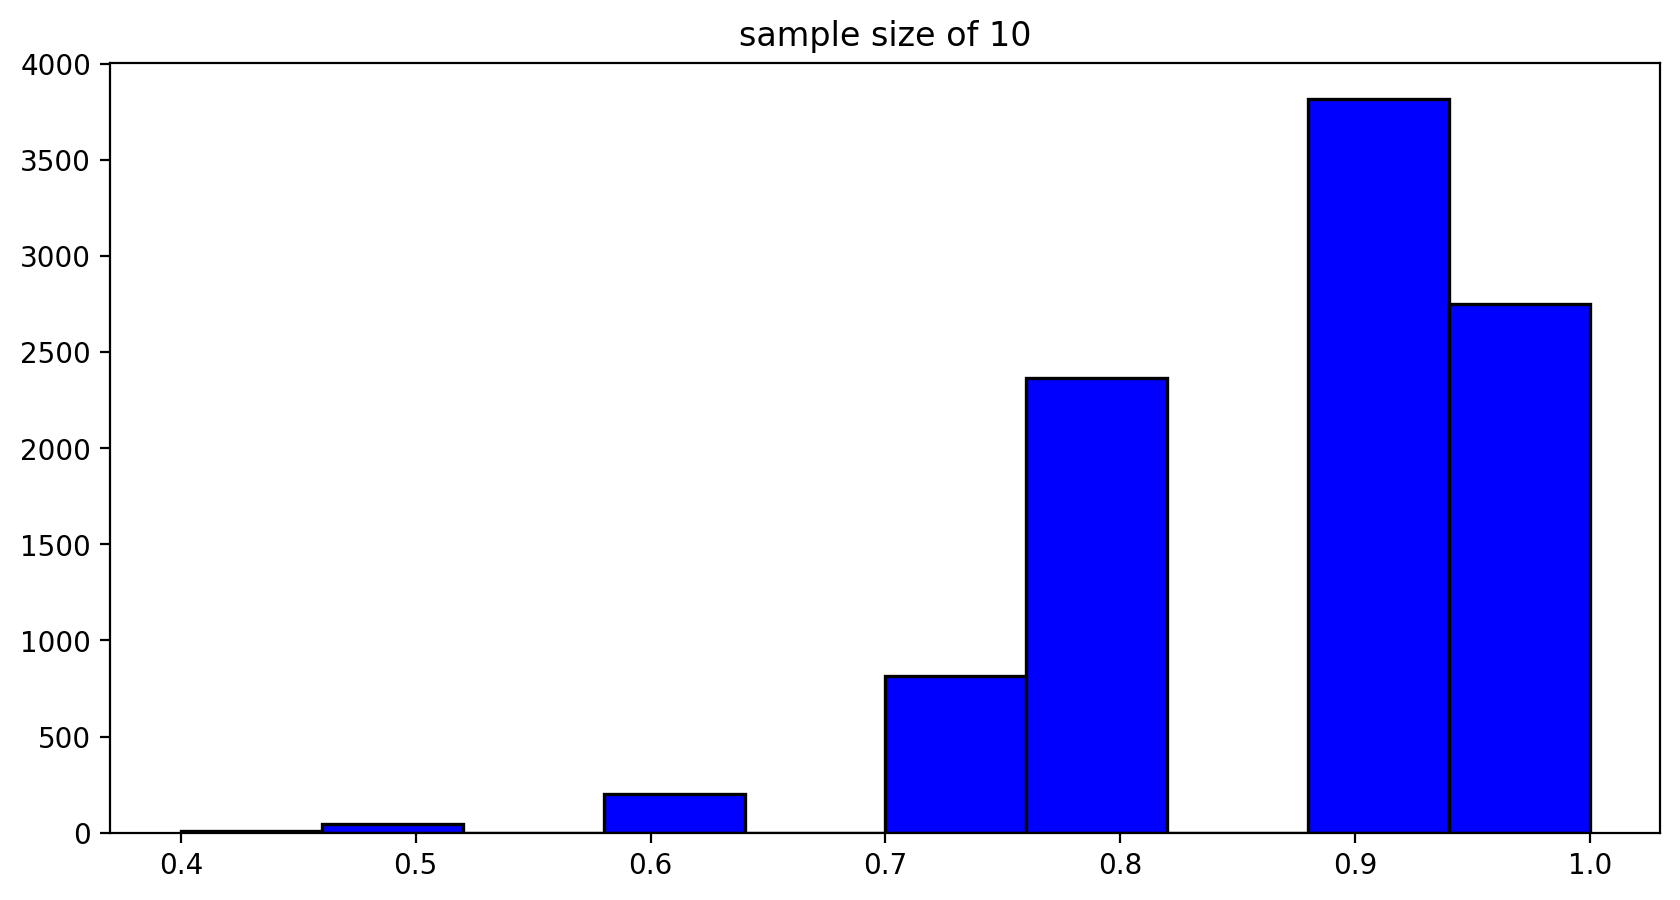

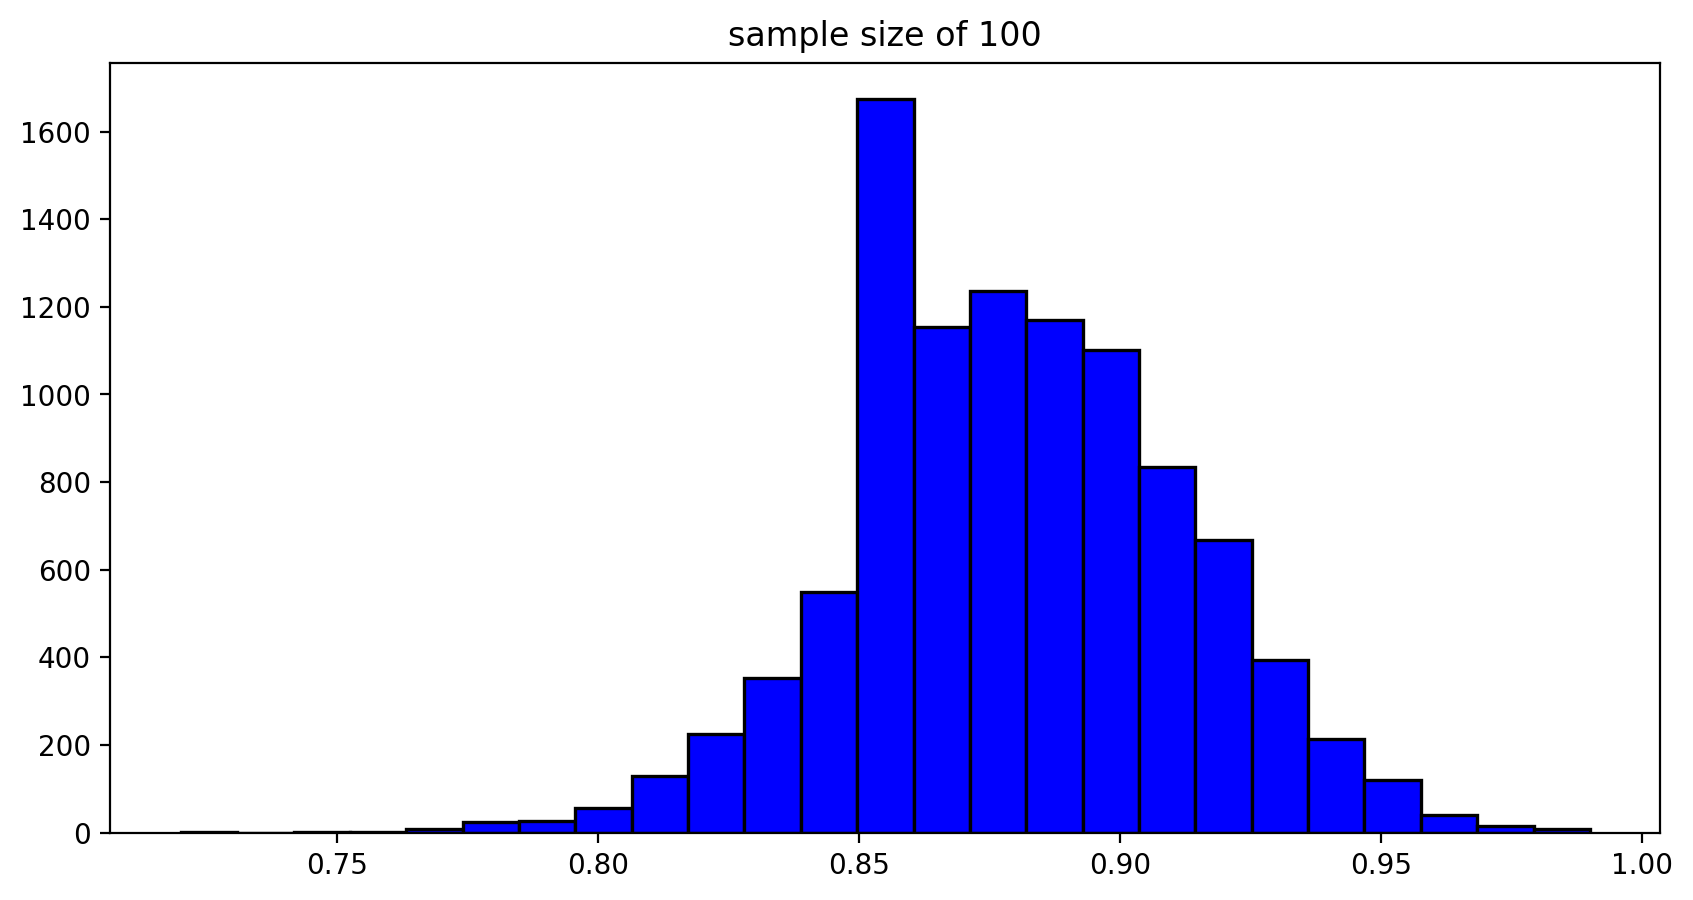

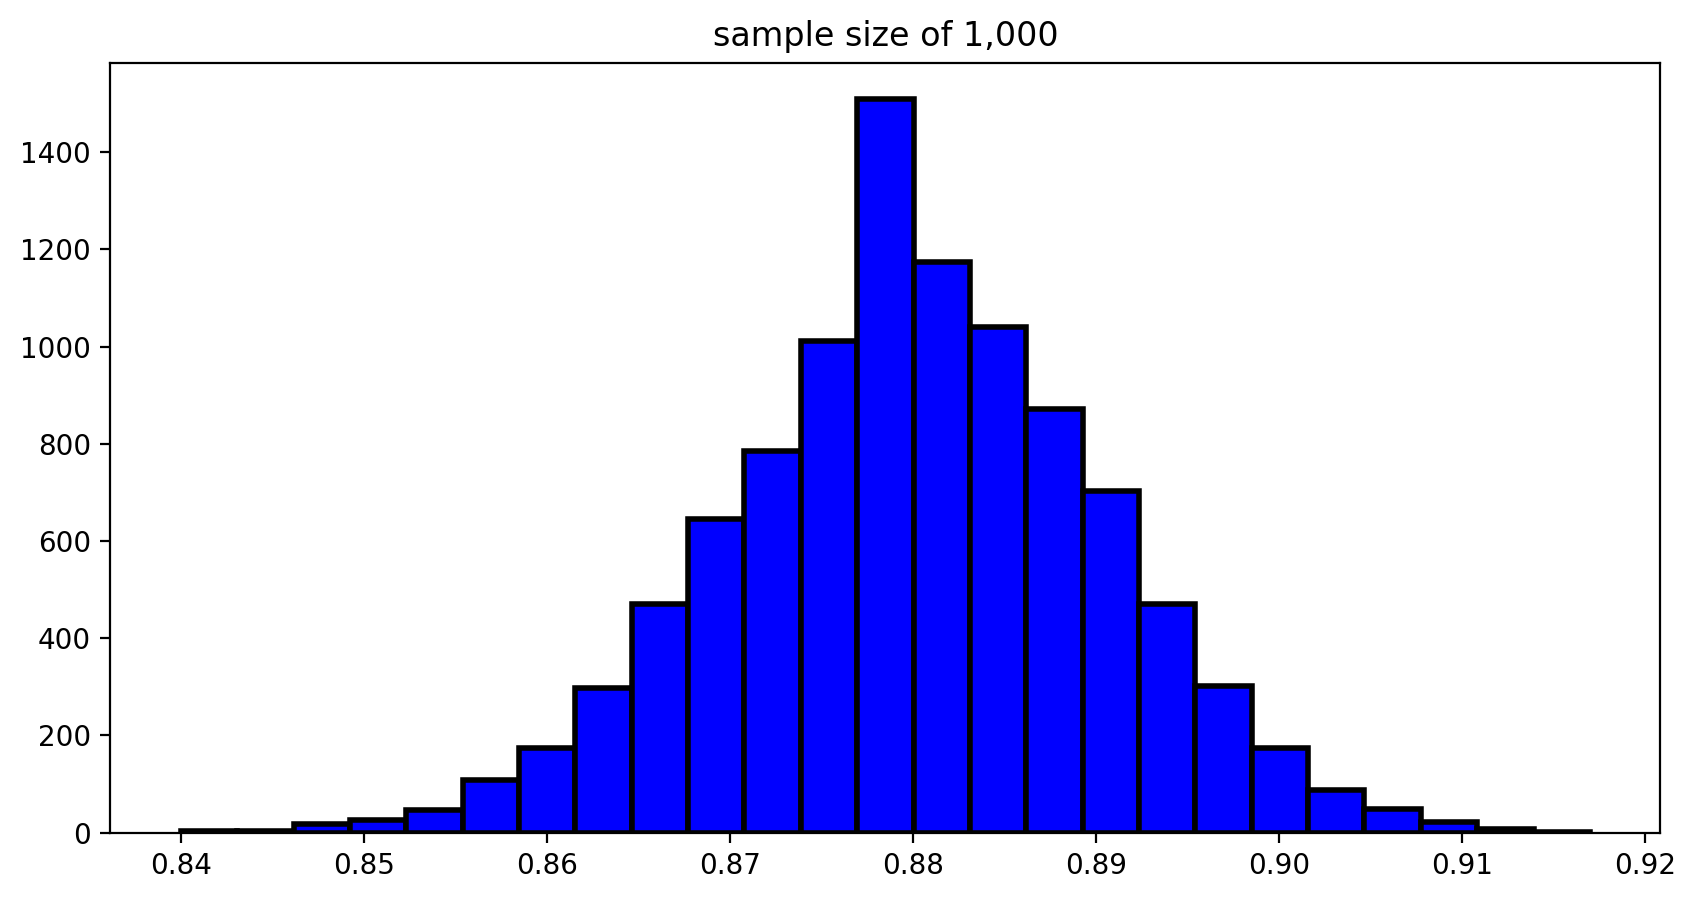

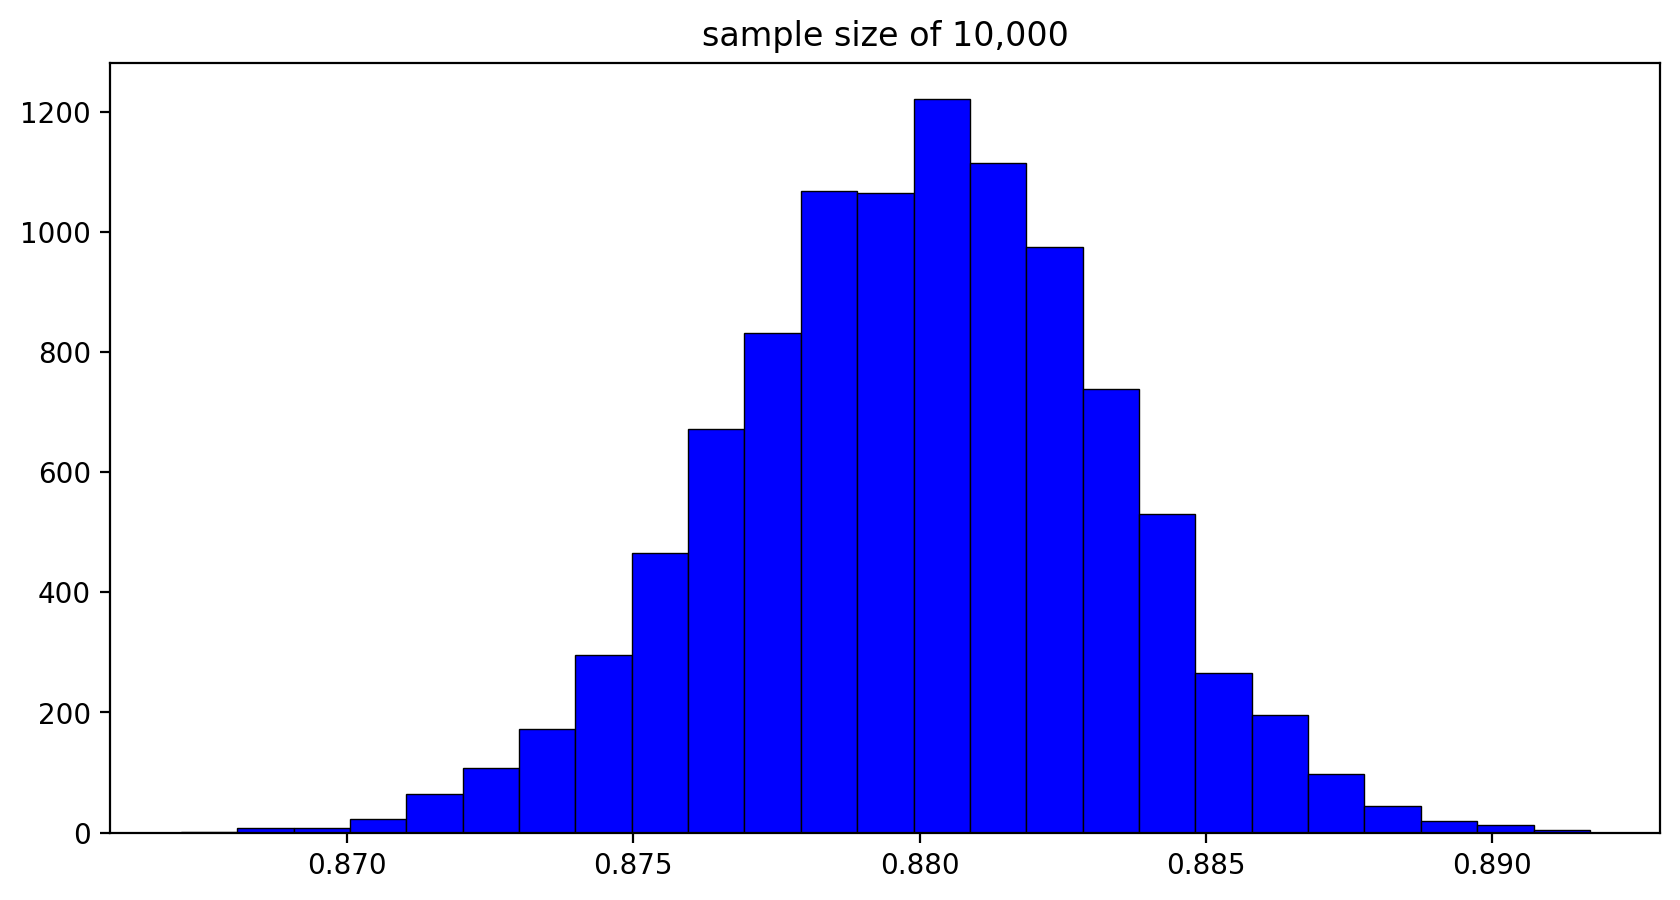

In [32]:
plt.hist(sample_mean10, edgecolor = 'black', linewidth = 1.2, bins = 10, color = 'blue')
plt.title("sample size of 10")
plt.show()


plt.hist(sample_mean100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("sample size of 100")
plt.show()


plt.hist(sample_mean1000, edgecolor = "black", linewidth = 2, bins = 25, color = 'blue')
plt.title("sample size of 1,000")
plt.show()


plt.hist(sample_mean10000, edgecolor = 'black', linewidth = 0.5, bins = 25, color = 'blue')
plt.title("sample size of 10,000")
plt.show() 

**Sampling erros and standard error of the sampling distribution**  
if you have 10,000 random samples of size 1,000 from a population, and you calculate the sample mean for each sample, then  
* The __Sampling Errors__ for each of these samples would be:  
$Sampling Error_i = Sample Mean_i - Population Mean$.   
where $i$ represents the sample number from 1 to 10,000.  
* The __Standard Deviation of these 10,000 Sampling Errors__ would give you an empirical estimation of the __Standard Error__ of the sampling distribution of the sample mean for samples of size 1,000. Mathematically:  
Standard Error(SE) $\approx$ Standard Deviation of Sampling Errors  
This empirical standard error should be very close to the theoretical standard error, which is: $SE = \frac{\sigma}{\sqrt{n}}$, where $\sigma$ is the population standard deviation and $n$ is the sample size (in this case, 1000)


In [47]:
#calculate the sampling errors of size 10,100,1000,10000
sample_error_10 = [i - p for i in sample_mean10]
sample_error_100 = [i - p for i in sample_mean100]
sample_error_1000 = [i - p for i in sample_mean1000]
sample_error_10000 = [i - p for i in sample_mean10000]

standard deviation of sampling error in a sample of size n equal to the standard errors of the sampling distribution of size n

In [48]:
print(np.std(sample_mean10) == np.std(sample_error_10))
print(np.std(sample_mean100) == np.std(sample_error_100))
print(np.std(sample_mean1000) == np.std(sample_error_1000))
print(np.std(sample_mean10000) == np.std(sample_error_10000))

True
True
True
True


In [9]:
me = 147-128
z = 1.96
z_new = scipy.stats.norm.ppf(0.05)
print([me,z_new])

[19, -1.6448536269514729]


In [10]:
xbar = (147+128)/2

In [12]:
print([xbar-z_new*me/2/z, xbar+z_new*(me/2/z)])

[145.47250482450968, 129.52749517549032]


In [21]:
0.025/0.013

1.9230769230769234

In [22]:
1-scipy.stats.norm.cdf(0.025/0.013)

0.027235195013738722

In [24]:
import numpy as np
np.sqrt(0.6*0.4/1017)

0.01536190745285137

In [25]:
1.96*np.sqrt(0.6*0.4/1017)

0.030109338607588684

In [26]:
sigma = 300
mu = 1500
z_star = 1.96
margin_err = 25


In [29]:
se = margin_err / z_star
n = np.power(sigma/se,2)
n

553.1904

In [30]:
mu = 32
s = 4.31
x_bar = 30.69
n = 36

In [31]:
se = s/np.sqrt(n)
z_score = (x_bar - mu)/se
print(z_score)


-1.82366589327146


In [34]:
import scipy
p_value = scipy.stats.norm.cdf(z_score) * 2
print(p_value)

0.06820259812700351


In [35]:
scipy.stats.norm.ppf(0.005)

-2.575829303548901

In [36]:
scipy.stats.norm.cdf(-0.2)

0.42074029056089696

In [37]:
scipy.stats.norm.ppf(0.8)

0.8416212335729143

In [38]:
scipy.stats.norm.ppf(0.975)

1.959963984540054

In [43]:
import numpy as np

In [57]:
n = 15
s = 0.069
iqr = 2.5
x_bar = 0.287

In [47]:
print([0.287 - iqr * s, 0.287 + iqr * s ])

[0.11449999999999996, 0.4595]


In [48]:
s = 0.069
se = 0.069/np.sqrt(n)

In [56]:
se

0.01781572339255412

In [49]:
df = n - 1

In [50]:
import scipy

In [54]:
t_critical = scipy.stats.t.ppf(0.95, df)

In [58]:
ci_lower = x_bar - t_critical * se
ci_upper = x_bar + t_critical * se
print([ci_lower, ci_upper])

[0.25562098581253323, 0.3183790141874667]


In [62]:
x_bar = 95.61
mu_0 = 93.28
s = 15.78
n = 100

In [63]:
df = n - 1
se = s/np.sqrt(n)

In [64]:
t_score = (x_bar - mu_0)/se

In [66]:
print(t_score)

1.4765525982256011


In [68]:
p_value = 2 * (1 - scipy.stats.t.cdf(t_score, df))
print(p_value)

0.14296948958490252


In [71]:
import scipy
import numpy as np
z_critical = scipy.stats.norm.ppf(0.95)
margin_of_err = 0.02
deno = np.power(margin_of_err/z_critical, 2)
p_hat = [0.017,0.062,0.013]


In [72]:
[p*(1-p)/deno for p in p_hat]

[113.03084165347109, 393.358962790932, 86.78707014874558]